Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
sum_even = 0
a, b = 1, 2
while a <= 4000000:
    if a % 2 == 0:
        sum_even += a
    a, b = b, a + b
print(sum_even)

4613732


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [5]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Linear Regression Metrics:
Train R2: 0.6089, Test R2: 0.5943
Train MAE: 0.5309, Test MAE: 0.5351
Train RMSE: 0.7235, Test RMSE: 0.7273

Linear Regression Coefficients:
      Feature  Coefficient
3   AveBedrms     0.593215
0      MedInc     0.433333
1    HouseAge     0.009293
4  Population    -0.000008
5    AveOccup    -0.004745
2    AveRooms    -0.098643
6    Latitude    -0.421449
7   Longitude    -0.434166


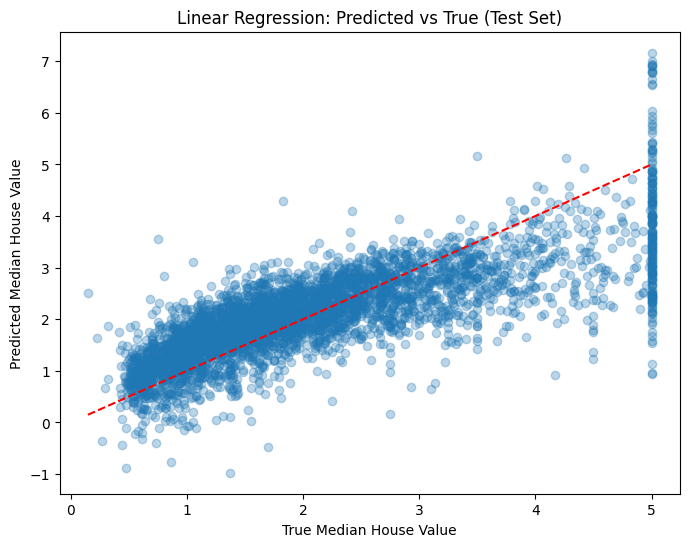

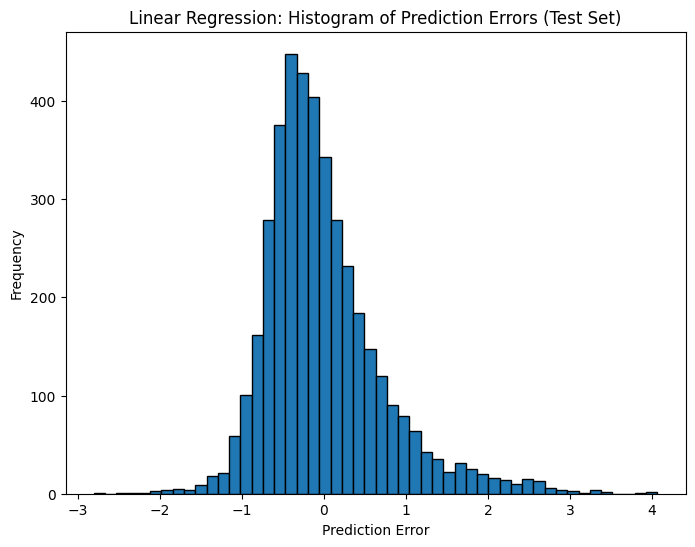


Random Forest Metrics:
Train R2: 0.9727, Test R2: 0.7981
Train MAE: 0.1234, Test MAE: 0.3358
Train RMSE: 0.1910, Test RMSE: 0.5131

Random Forest Feature Importances:
      Feature  Importance
0      MedInc    0.529520
5    AveOccup    0.135255
6    Latitude    0.084846
7   Longitude    0.083737
1    HouseAge    0.055837
2    AveRooms    0.047262
4  Population    0.032957
3   AveBedrms    0.030587


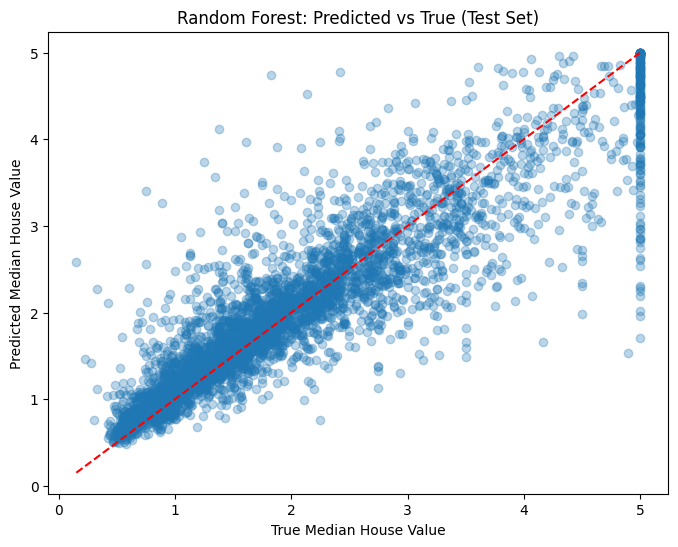

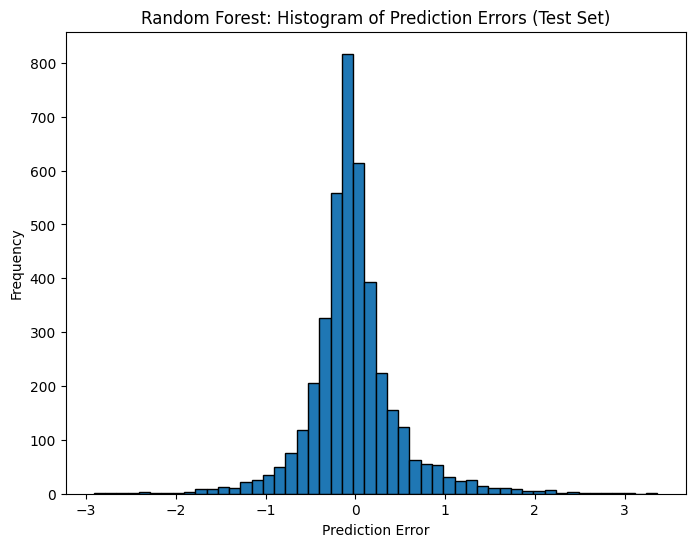


Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0

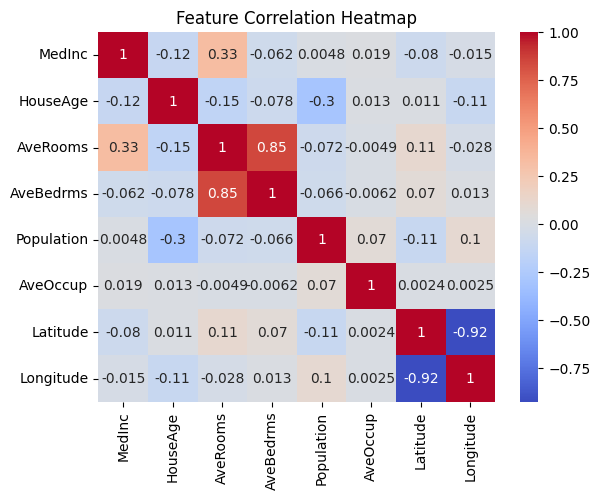

In [6]:
# your code here

# Import necessary libraries for regression and metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Metrics for Linear Regression
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))  # Fix: Use np.sqrt
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))    # Fix: Use np.sqrt

print("Linear Regression Metrics:")
print(f"Train R2: {r2_train_lr:.4f}, Test R2: {r2_test_lr:.4f}")
print(f"Train MAE: {mae_train_lr:.4f}, Test MAE: {mae_test_lr:.4f}")
print(f"Train RMSE: {rmse_train_lr:.4f}, Test RMSE: {rmse_test_lr:.4f}")

# Feature importance for Linear Regression (coefficients)
lr_coefs = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_})
lr_coefs = lr_coefs.sort_values(by='Coefficient', ascending=False)
print("\nLinear Regression Coefficients:")
print(lr_coefs)

# Scatterplot: Predicted vs True for Test Set (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Predicted vs True (Test Set)')
plt.show()

# Histogram of Errors (Linear Regression)
errors_lr = y_test - y_pred_test_lr
plt.figure(figsize=(8, 6))
plt.hist(errors_lr, bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Linear Regression: Histogram of Prediction Errors (Test Set)')
plt.show()

# Explore another method: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Metrics for Random Forest
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))  # Fix: Use np.sqrt
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))    # Fix: Use np.sqrt

print("\nRandom Forest Metrics:")
print(f"Train R2: {r2_train_rf:.4f}, Test R2: {r2_test_rf:.4f}")
print(f"Train MAE: {mae_train_rf:.4f}, Test MAE: {mae_test_rf:.4f}")
print(f"Train RMSE: {rmse_train_rf:.4f}, Test RMSE: {rmse_test_rf:.4f}")

# Feature importance for Random Forest
rf_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_importances)

# Scatterplot: Predicted vs True for Test Set (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Predicted vs True (Test Set)')
plt.show()

# Histogram of Errors (Random Forest)
errors_rf = y_test - y_pred_test_rf
plt.figure(figsize=(8, 6))
plt.hist(errors_rf, bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Random Forest: Histogram of Prediction Errors (Test Set)')
plt.show()

# Optional: Check for correlations to consider excluding variables
corr_matrix = X.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here